In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhi-air-quality-dataset/final_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/delhi-air-quality-dataset/final_dataset.csv")

In [3]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [4]:
df.tail()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
1456,27,12,2024,0,5,58.43,249.17,41.69,65.89,0.99,36.25,263
1457,28,12,2024,0,6,33.83,150.77,33.31,66.14,0.79,35.19,113
1458,29,12,2024,1,7,31.21,139.75,27.01,65.94,0.57,35.88,142
1459,30,12,2024,0,1,38.01,152.83,29.12,65.16,0.55,38.38,116
1460,31,12,2024,0,2,80.42,318.96,40.37,64.98,0.84,39.93,209


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [6]:
df.describe()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [7]:
df.shape

(1461, 12)

In [8]:
df.dtypes

Date                int64
Month               int64
Year                int64
Holidays_Count      int64
Days                int64
PM2.5             float64
PM10              float64
NO2               float64
SO2               float64
CO                float64
Ozone             float64
AQI                 int64
dtype: object

In [9]:
df.columns

Index(['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

In [12]:
(df.isnull().sum()/len(df)*100)

Date              0.0
Month             0.0
Year              0.0
Holidays_Count    0.0
Days              0.0
PM2.5             0.0
PM10              0.0
NO2               0.0
SO2               0.0
CO                0.0
Ozone             0.0
AQI               0.0
dtype: float64

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


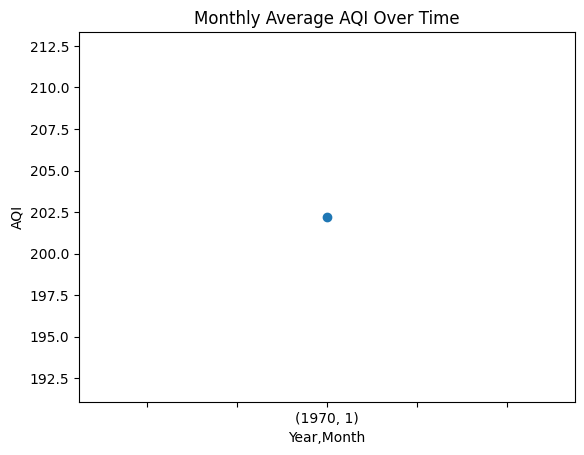

In [14]:
df.groupby(['Year', 'Month'])['AQI'].mean().plot(kind='line', marker='o')
plt.title("Monthly Average AQI Over Time")
plt.ylabel("AQI")
plt.show()

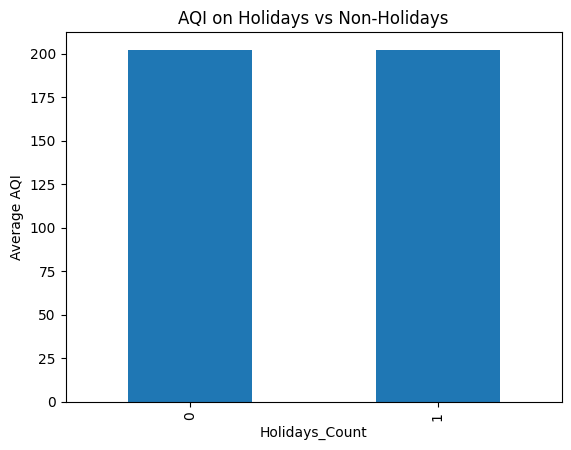

In [15]:
df.groupby('Holidays_Count')['AQI'].mean().plot(kind='bar')
plt.title("AQI on Holidays vs Non-Holidays")
plt.ylabel("Average AQI")
plt.show()

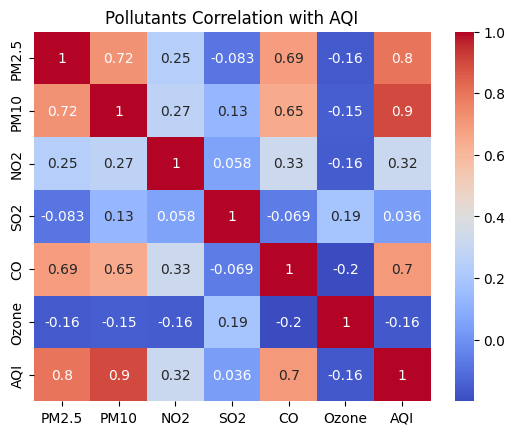

In [16]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']
sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm')
plt.title("Pollutants Correlation with AQI")
plt.show()

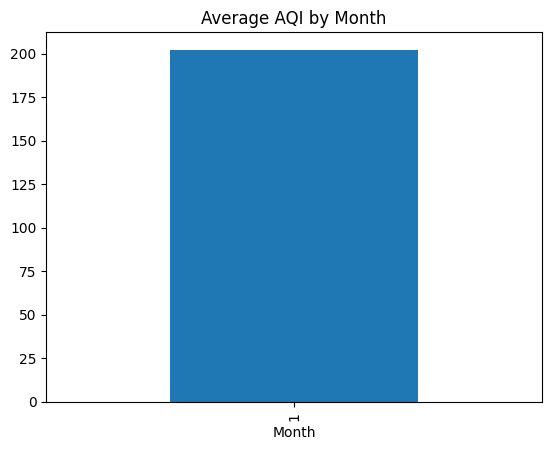

In [17]:
df.groupby('Month')['AQI'].mean().plot(kind='bar')
plt.title("Average AQI by Month")
plt.show()


In [18]:
df.nlargest(10, 'AQI')[['Date', 'AQI', 'PM2.5', 'PM10']]


,Date,AQI,PM2.5,PM10
736,1970-01-01 00:00:00.000000007,500,200.60,1000.00
737,1970-01-01 00:00:00.000000008,500,232.78,869.48
359,1970-01-01 00:00:00.000000026,490,432.88,595.44
315,1970-01-01 00:00:00.000000012,489,387.18,451.81
1,1970-01-01 00:00:00.000000002,482,404.04,561.95
357,1970-01-01 00:00:00.000000024,473,414.69,671.99
356,1970-01-01 00:00:00.000000023,468,408.83,679.54
1417,1970-01-01 00:00:00.000000018,468,306.91,844.09
358,1970-01-01 00:00:00.000000025,467,430.84,656.11
384,1970-01-01 00:00:00.000000020,465,284.88,539.69
